In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
# from pandas_profiling import ProfileReport
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('all_train.csv')

In [4]:
# Install the below libaries before importing

# EDA using pandas-profiling
# profile = ProfileReport(pd.read_csv('all_train.csv'), explorative=True)

# Saving results to a HTML file
# profile.to_file("output.html")

### EDA is complete in the output file. There is no missing data. The response variable, label, is pretty closeley even, 3500879 to 3499121.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


In [6]:
# change # label to "response"
df.rename(columns={'# label': 'response'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column    Dtype  
---  ------    -----  
 0   response  float64
 1   f0        float64
 2   f1        float64
 3   f2        float64
 4   f3        float64
 5   f4        float64
 6   f5        float64
 7   f6        float64
 8   f7        float64
 9   f8        float64
 10  f9        float64
 11  f10       float64
 12  f11       float64
 13  f12       float64
 14  f13       float64
 15  f14       float64
 16  f15       float64
 17  f16       float64
 18  f17       float64
 19  f18       float64
 20  f19       float64
 21  f20       float64
 22  f21       float64
 23  f22       float64
 24  f23       float64
 25  f24       float64
 26  f25       float64
 27  f26       float64
 28  mass      float64
dtypes: float64(29)
memory usage: 1.5 GB


In [7]:
df

,response,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000


In [8]:
#  Number of counts for response
df.response.value_counts()

1.0    3500879
0.0    3499121
Name: response, dtype: int64

response is a binary response .. we can use sigmoid as our final activation in our layers for our NN

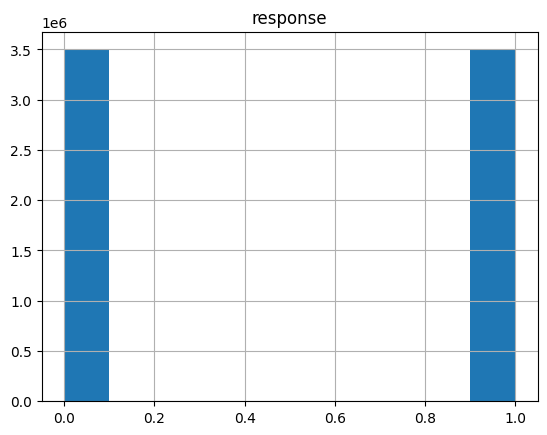

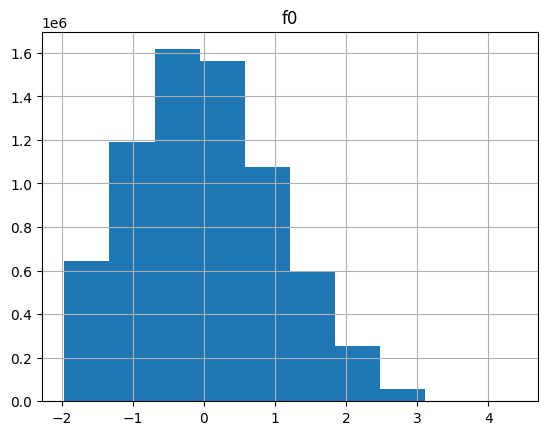

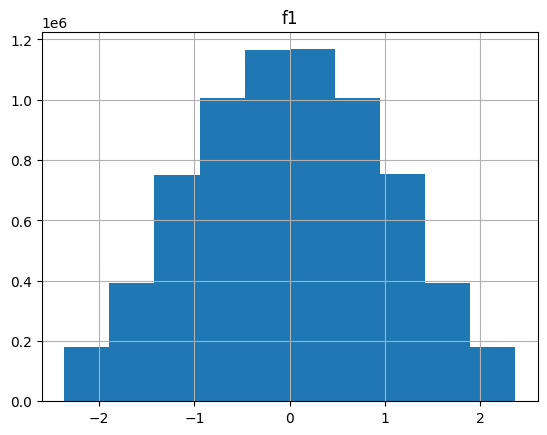

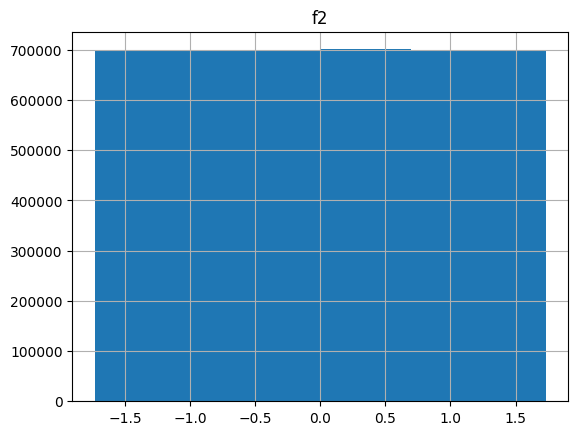

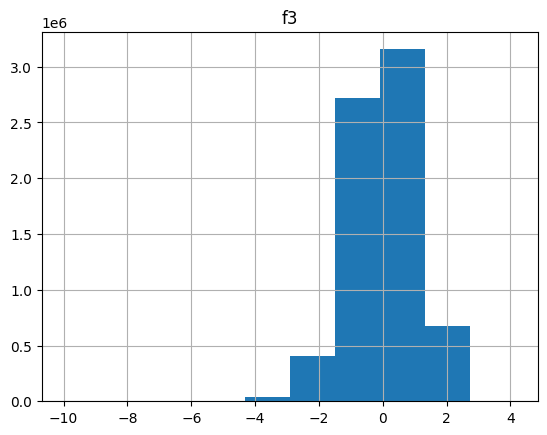

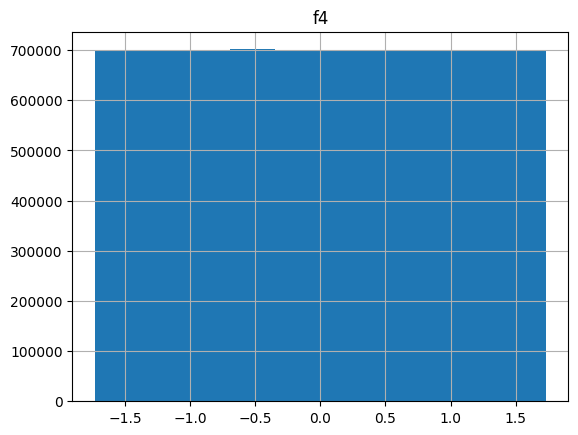

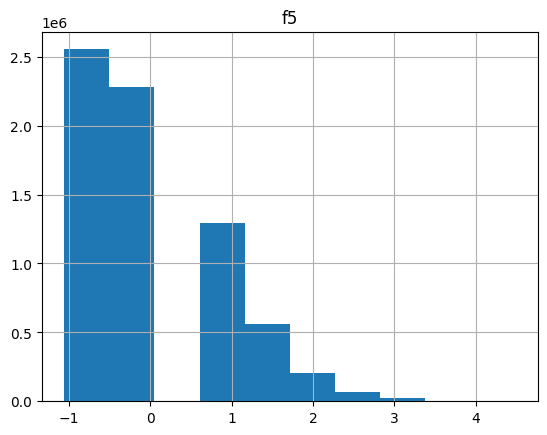

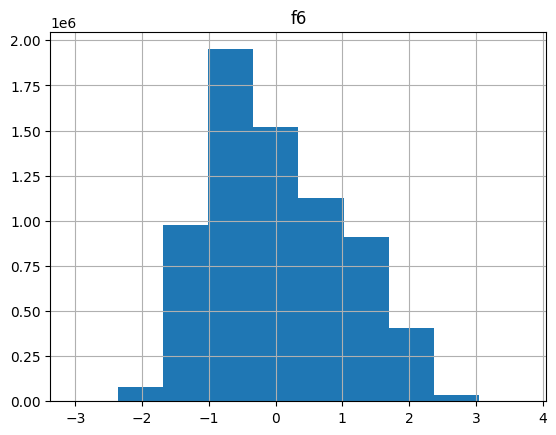

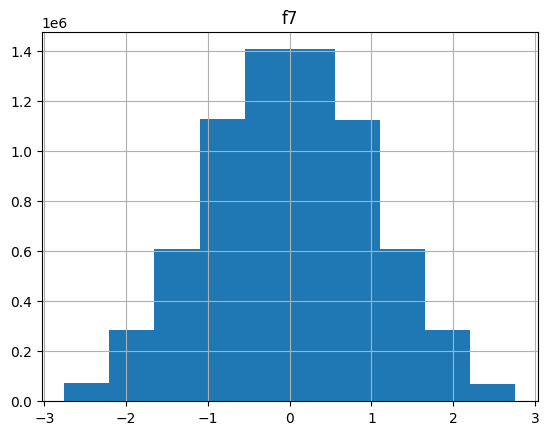

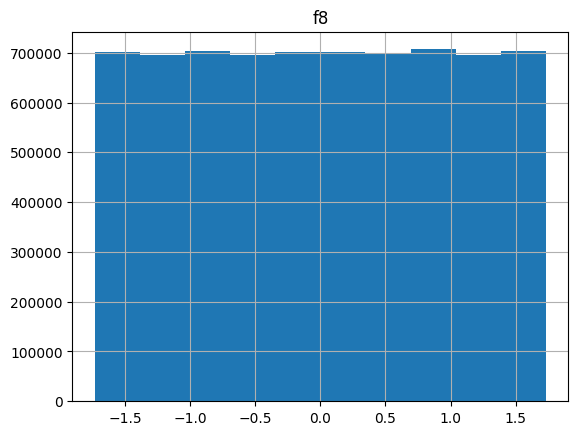

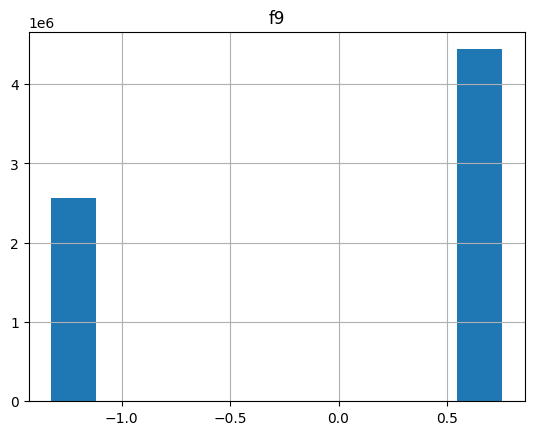

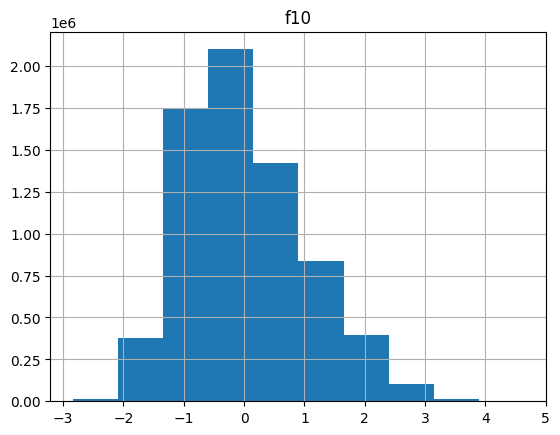

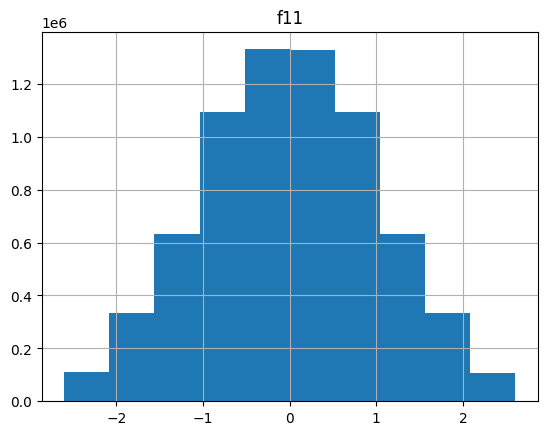

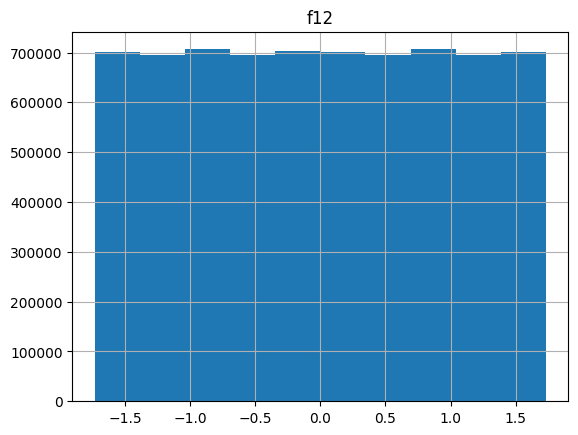

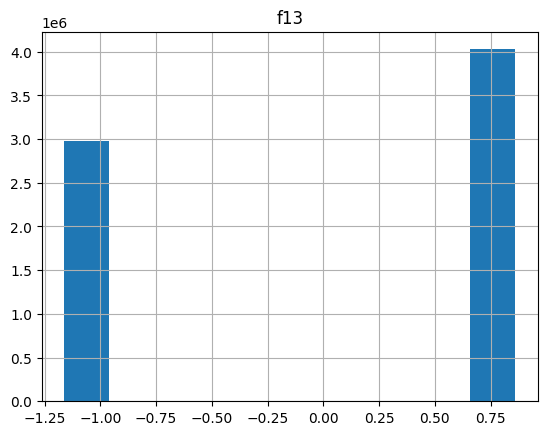

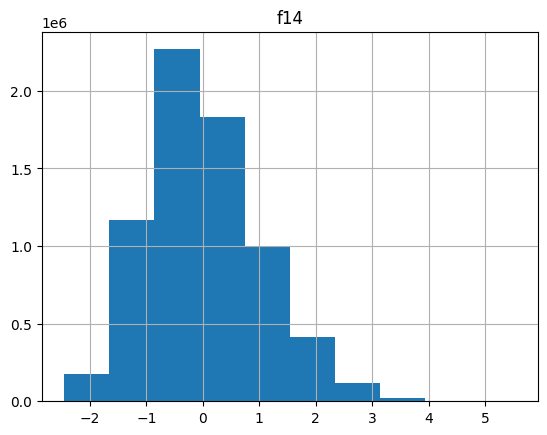

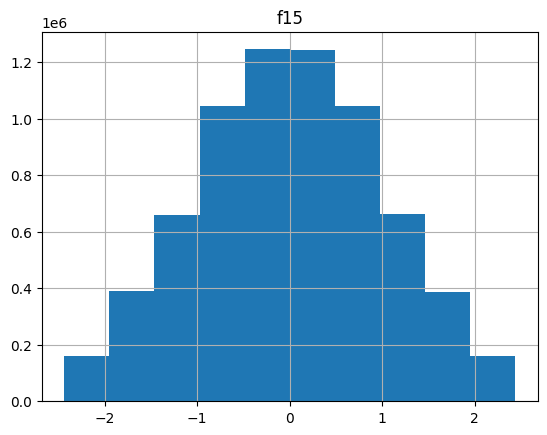

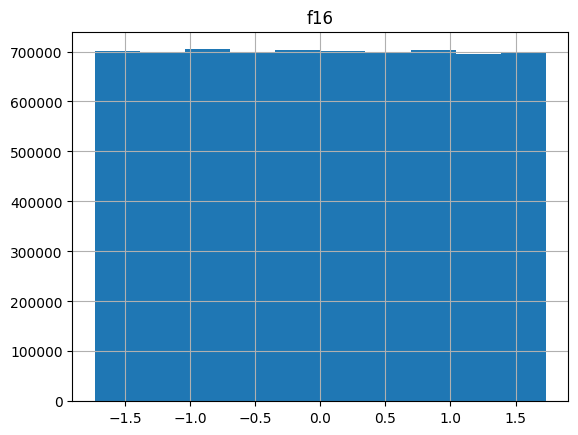

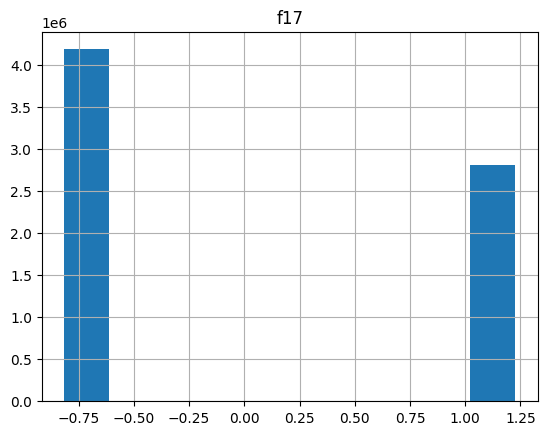

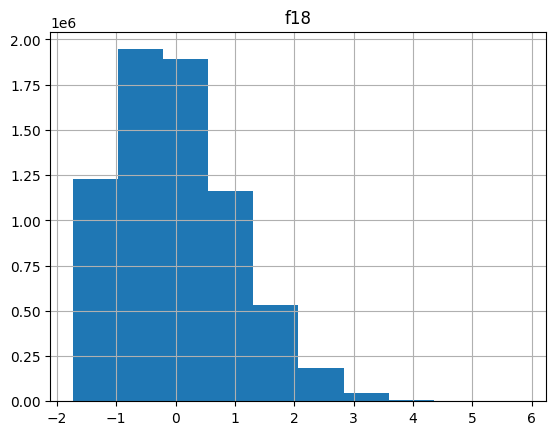

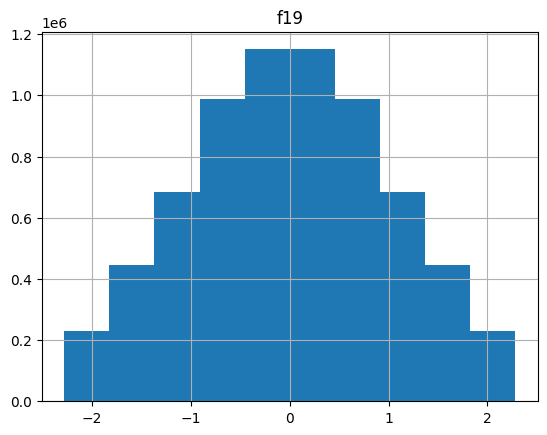

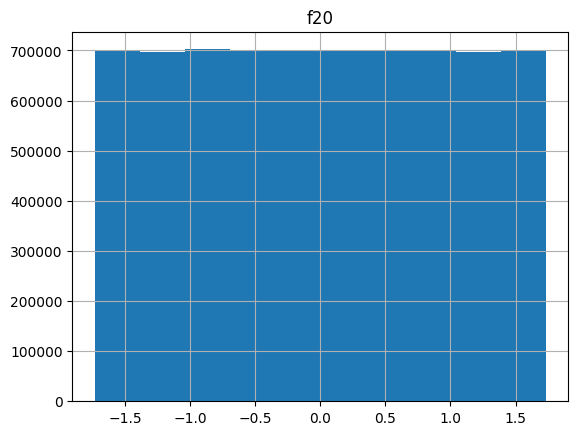

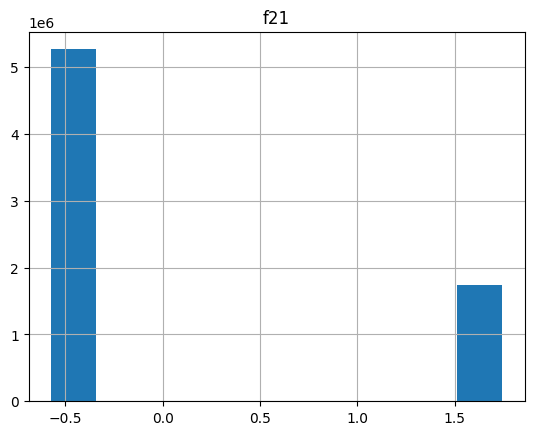

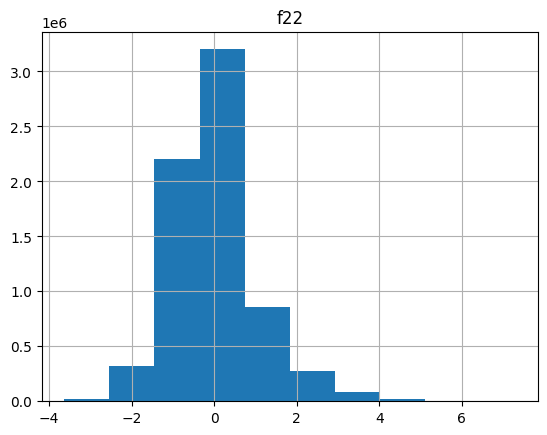

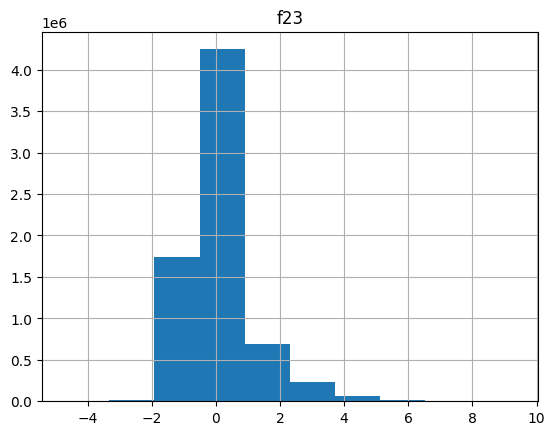

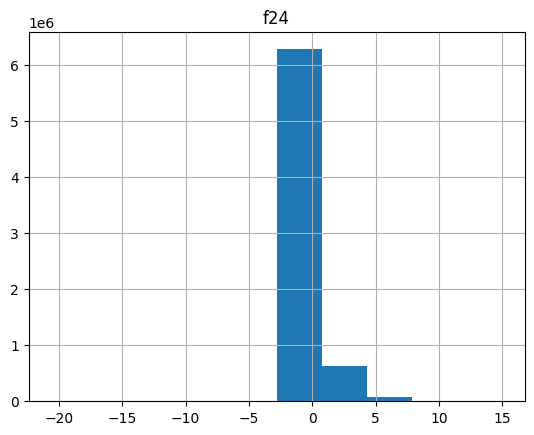

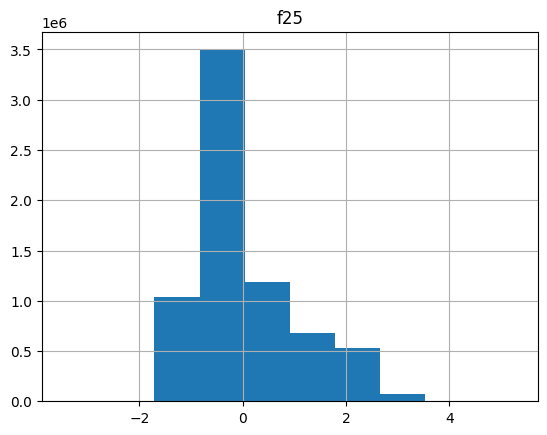

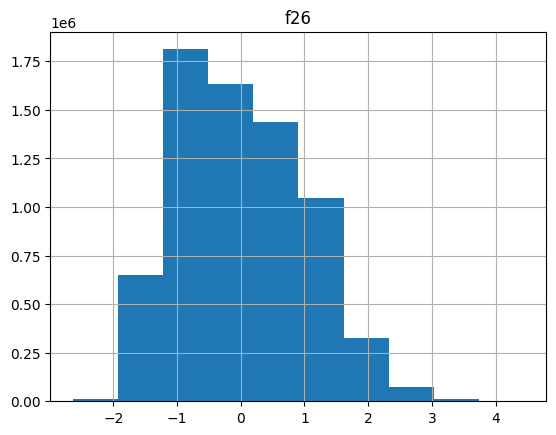

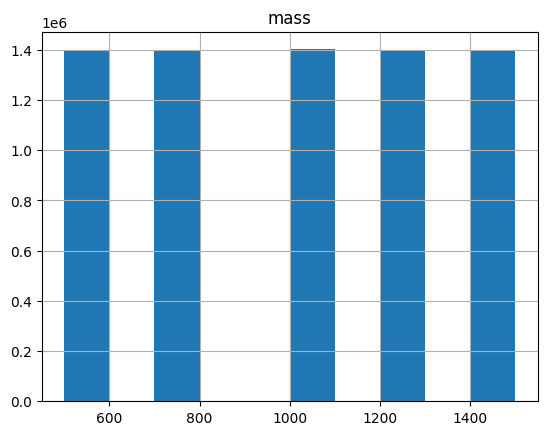

In [9]:
for i in df:
    df[i].hist()
    plt.title(i)
    plt.show()

### Split Data into test and train while scaling

In [10]:
scaler = StandardScaler()

X = df.loc[:, df.columns != 'response'].values

y = df['response'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Random Search CV

In [12]:
log_root = os.path.join(os.curdir, "my_training_logs")


def get_log_dir():
    import time
    timestamp = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(log_root, timestamp)


log_dir = get_log_dir()

# # Print current working directory and log directory
# print(os.getcwd())
# print(log_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)


def create_model(num_hidden_layers=1, num_neurons=30,
                 learning_rate=3e-3, input_shape=[28]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons, activation="relu"))
        model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.BinaryCrossentropy()
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model


classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(create_model)

param_distributions = {
    "num_hidden_layers": [0, 1, 2, 3],
    "num_neurons": np.arange(1, 500),
    "learning_rate": [1e-3, 3e-3, 5e-3, 7e-3, 1e-2]
}

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3, min_delta=2e-4)

random_search_cv = RandomizedSearchCV(classifier,
                                      param_distributions,
                                      n_iter=5, cv=3)
random_search_cv.fit(X_train, y_train, epochs=500,
                     validation_data=(X_test, y_test),
                     callbacks=[tensorboard_callback,
                                early_stop], batch_size=1000)

C:\Users\shijo\AppData\Local\Temp\ipykernel_28756\3858710698.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(create_model)


Epoch 1/500
3734/3734 [==============================] - 7s 2ms/step - loss: 0.3808 - accuracy: 0.8276 - val_loss: 0.3648 - val_accuracy: 0.8374
Epoch 2/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.3659 - accuracy: 0.8364 - val_loss: 0.3648 - val_accuracy: 0.8366
Epoch 3/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.3660 - accuracy: 0.8364 - val_loss: 0.3647 - val_accuracy: 0.8368
Epoch 4/500
58334/58334 [==============================] - 56s 961us/step - loss: 0.3652 - accuracy: 0.8373
Epoch 1/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.3763 - accuracy: 0.8306 - val_loss: 0.3647 - val_accuracy: 0.8375
Epoch 2/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.3656 - accuracy: 0.8367 - val_loss: 0.3649 - val_accuracy: 0.8367
Epoch 3/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.3656 - accuracy: 0.8366 - val_loss: 0.3648 - val_accuracy: 0.8373
Epoch 4/500
58334/5833

3734/3734 [==============================] - 6s 2ms/step - loss: 0.2893 - accuracy: 0.8677 - val_loss: 0.2807 - val_accuracy: 0.8722
Epoch 13/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.2890 - accuracy: 0.8678 - val_loss: 0.2820 - val_accuracy: 0.8714
Epoch 14/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.2889 - accuracy: 0.8677 - val_loss: 0.2812 - val_accuracy: 0.8718
Epoch 15/500
58334/58334 [==============================] - 58s 999us/step - loss: 0.2828 - accuracy: 0.8711
Epoch 1/500
3734/3734 [==============================] - 7s 2ms/step - loss: 0.3002 - accuracy: 0.8610 - val_loss: 0.2885 - val_accuracy: 0.8671
Epoch 2/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.2928 - accuracy: 0.8654 - val_loss: 0.2840 - val_accuracy: 0.8702
Epoch 3/500
3734/3734 [==============================] - 6s 2ms/step - loss: 0.2909 - accuracy: 0.8667 - val_loss: 0.2831 - val_accuracy: 0.8704
Epoch 4/500
3734/3734 [========

3734/3734 [==============================] - 7s 2ms/step - loss: 0.2844 - accuracy: 0.8733 - val_loss: 0.2760 - val_accuracy: 0.8775
Epoch 9/500
58334/58334 [==============================] - 60s 1ms/step - loss: 0.2729 - accuracy: 0.8776
Epoch 1/500
3734/3734 [==============================] - 8s 2ms/step - loss: 0.2960 - accuracy: 0.8654 - val_loss: 0.2801 - val_accuracy: 0.8721
Epoch 2/500
3734/3734 [==============================] - 7s 2ms/step - loss: 0.2877 - accuracy: 0.8709 - val_loss: 0.2852 - val_accuracy: 0.8760
Epoch 3/500
3734/3734 [==============================] - 7s 2ms/step - loss: 0.2861 - accuracy: 0.8720 - val_loss: 0.2738 - val_accuracy: 0.8764
Epoch 4/500
3734/3734 [==============================] - 7s 2ms/step - loss: 0.2852 - accuracy: 0.8726 - val_loss: 0.2788 - val_accuracy: 0.8767
Epoch 5/500
3734/3734 [==============================] - 8s 2ms/step - loss: 0.2846 - accuracy: 0.8730 - val_loss: 0.2733 - val_accuracy: 0.8777
Epoch 6/500
3734/3734 [=============

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BBCFEDC430>,
                   n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.003, 0.005,
                                                          0.007, 0.01],
                                        'num_hidden_layers': [0, 1, 2, 3],
                                        'num_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42...
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499])})

In [13]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)

{'num_neurons': 387, 'num_hidden_layers': 2, 'learning_rate': 0.01}
0.8781439463297526


#### Creating Final Model

In [14]:
log_root = os.path.join(os.curdir, "my_final_logs")


def get_log_dir():
    import time
    timestamp = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(log_root, timestamp)


log_dir = get_log_dir()

# # Print current working directory and log directory
# print(os.getcwd())
# print(log_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)

In [16]:
num_neurons = 387
input_shape = [28]
learning_rate = 0.01

final_model = tf.keras.models.Sequential()
final_model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
final_model.add(tf.keras.layers.Dense(num_neurons, activation="relu"))
final_model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
final_model.add(tf.keras.layers.Dense(num_neurons, activation="relu"))
final_model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
final_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.BinaryCrossentropy()
final_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [17]:
final_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 387)               11223     
                                                                 
 dropout_55 (Dropout)        (None, 387)               0         
                                                                 
 dense_89 (Dense)            (None, 387)               150156    
                                                                 
 dropout_56 (Dropout)        (None, 387)               0         
                                                                 
 dense_90 (Dense)            (None, 1)                 388       
                                                                 
Total params: 161,767
Trainable params: 161,767
Non-trainable params: 0
_________________________________________________________________


In [18]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=3, min_delta=2e-4)
final_model.fit(X_train, y_train, epochs=500,
                validation_data=(X_test, y_test),
                callbacks=[tensorboard_callback, early_stop],
                batch_size=1000)

Epoch 1/500
5600/5600 [==============================] - 9s 1ms/step - loss: 0.2906 - accuracy: 0.8681 - val_loss: 0.2783 - val_accuracy: 0.8748
Epoch 2/500
5600/5600 [==============================] - 8s 2ms/step - loss: 0.2832 - accuracy: 0.8728 - val_loss: 0.2782 - val_accuracy: 0.8762
Epoch 3/500
5600/5600 [==============================] - 8s 1ms/step - loss: 0.2815 - accuracy: 0.8736 - val_loss: 0.2713 - val_accuracy: 0.8777
Epoch 4/500
5600/5600 [==============================] - 8s 1ms/step - loss: 0.2805 - accuracy: 0.8741 - val_loss: 0.2719 - val_accuracy: 0.8771
Epoch 5/500
5600/5600 [==============================] - 8s 2ms/step - loss: 0.2799 - accuracy: 0.8745 - val_loss: 0.2710 - val_accuracy: 0.8788
Epoch 6/500
5600/5600 [==============================] - 8s 2ms/step - loss: 0.2796 - accuracy: 0.8747 - val_loss: 0.2700 - val_accuracy: 0.8788
Epoch 7/500
5600/5600 [==============================] - 8s 1ms/step - loss: 0.2792 - accuracy: 0.8750 - val_loss: 0.2693 - val_ac

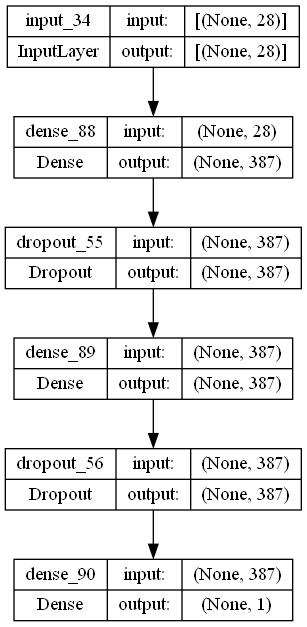

In [19]:
tf.keras.utils.plot_model(final_model, to_file='model.png',
                          show_shapes=True, show_layer_names=True)

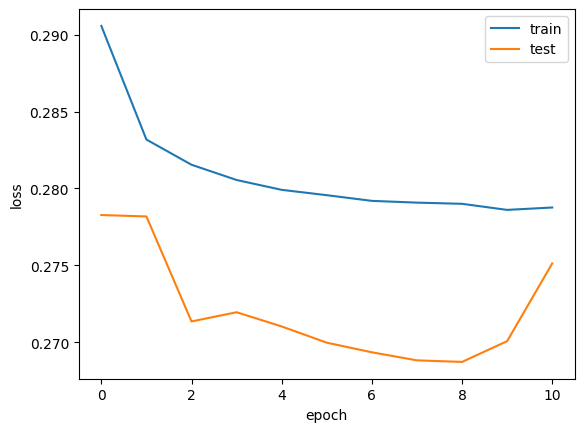

In [20]:
train_loss = final_model.history.history['loss']
val_loss = final_model.history.history['val_loss']
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

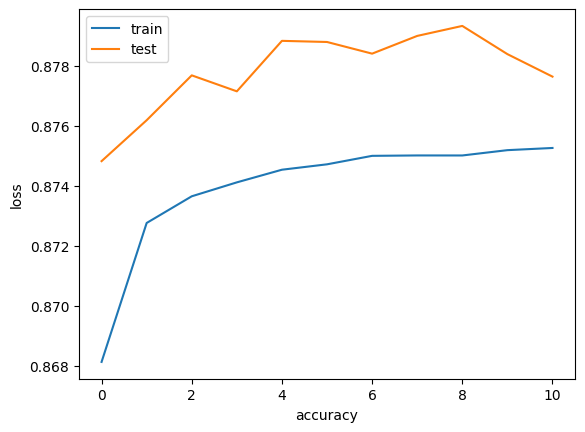

In [21]:
train_acc = final_model.history.history['accuracy']
val_acc = final_model.history.history['val_accuracy']
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='test')
plt.legend()
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.show()

In [25]:
preds = final_model.predict(X_test)

43750/43750 [==============================] - 28s 633us/step


In [26]:
preds = (preds > .5).astype(int)

In [27]:
print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87    699151
         1.0       0.84      0.93      0.88    700849

    accuracy                           0.88   1400000
   macro avg       0.88      0.88      0.88   1400000
weighted avg       0.88      0.88      0.88   1400000

